In [1]:
# IMPORTS
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

# SPLITTING THE DATASET
df = pd.read_csv('DATASET-balanced 1.csv')
x = df.drop('LABEL', axis = 1)
y = df['LABEL']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

pred_final = model.predict(x_test)

accuracy = round(accuracy_score(y_test, pred_final) * 100, 3)
auc = round(roc_auc_score(y_test, pred_final), 3)
prec = round(precision_score(y_test, pred_final, average="binary", pos_label=1), 3)
rec = round(recall_score(y_test, pred_final, average="binary", pos_label=1), 3)
f1 = round(f1_score(y_test, pred_final, average="binary", pos_label=1), 3)
mcc = round(matthews_corrcoef(y_test, pred_final), 3)
mse = round(mean_squared_error(y_test, pred_final), 3)
mae = round(mean_absolute_error(y_test, pred_final), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("MCC:", mcc)
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE):", mae)

 Accuracy: 86.842%
 AUC score: 0.87
Precision: 0.911
Recall: 0.826
F1-score: 0.867
MCC: 0.741
Mean Squared Error (MSE) : 0.132
Mean Absolute Error (MAE): 0.132


Confusion Matrix:
[[1039   98]
 [ 212 1007]]


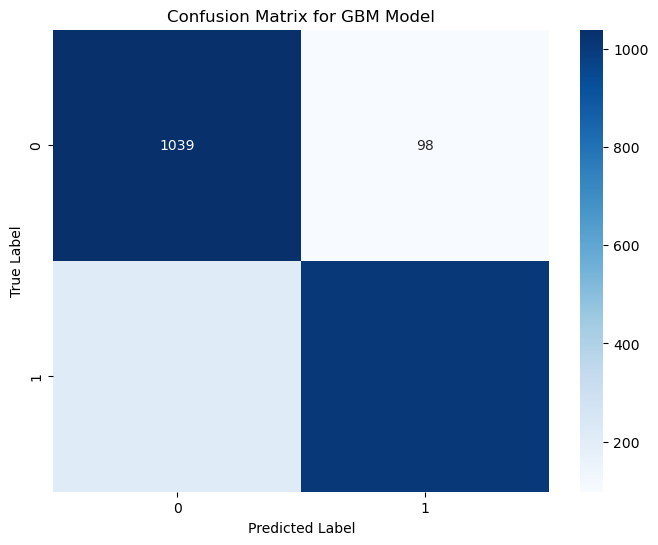

In [3]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_final)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the heat map for AdaBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for GBM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# PLOTTING LOSS GRAPH
def plot_loss_curve(model, x_train, y_train, x_test, y_test):
    train_errors = [mean_squared_error(y_train, y_pred) for y_pred in model.staged_predict(x_train)]
    test_errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(x_test)]

    plt.plot(train_errors, label='Train Set')
    plt.plot(test_errors, label='Test Set')
    plt.xlabel('Number of Trees')
    plt.ylabel('Mean Squared Error')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

In [ ]:
plot_loss_curve(model, x_train, y_train, x_test, y_test)

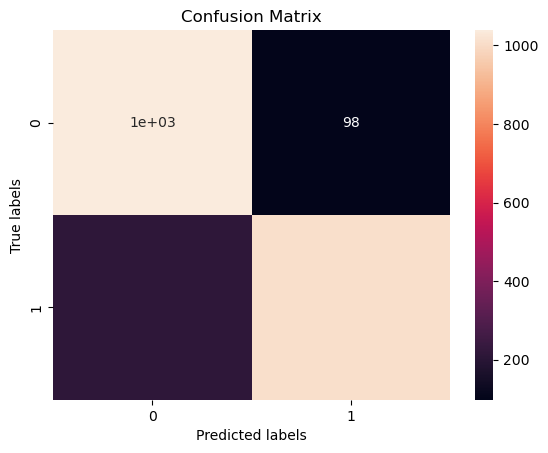

In [4]:
from sklearn.metrics import confusion_matrix
# PLOTTING HEAT MAP
def plot_heat_map(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

plot_heat_map(model, x_test, y_test)

In [ ]:
# PLOTTING FEATURE IMPORTANCE
def plot_feature_importance(model, feature_names):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(feature_names)[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance')
    plt.show()

plot_feature_importance(model, x_train.columns)